In [ ]:
# para conectar con Drive
from google.colab import drive

drive.mount('/content/drive/')

PATH = '/content/drive/My Drive/ML_Practicas_2020/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
#Descargar los datos de fashion_mnist


import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Verificación carga completa:
## Training dataset
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_train Dimensiones:", x_train.ndim, "y_train Dimensiones:", y_train.ndim)
print("x_train Tipo de Dato:", x_train.dtype, "y_train Tipo de Dato:", y_train.dtype)
print("x_train Tamaño:", x_train.size, "y_train Tamaño:", y_train.size)

print('----------------------------------------------------------')

## Test dataset
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)
print("x_test Dimensiones:", x_test.ndim, "y_test Dimensiones:", y_test.ndim)
print("x_test Tipo de Dato:", x_test.dtype, "y_test Tipo de Dato:", y_test.dtype)
print("x_test Tamaño:", x_test.size, "y_test Tamaño:", y_test.size)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_train Dimensiones: 3 y_train Dimensiones: 1
x_train Tipo de Dato: uint8 y_train Tipo de Dato: uint8
x_train Tamaño: 47040000 y_train Tamaño: 60000
----------------------------------------------------------
x_test shape: (10000, 28, 28) y_test shape: (10000,)
x_test Dimensiones: 3 y_test Dimensiones: 1
x_test Tipo de Dato: uint8 y_test Tipo de Dato: uint8
x_test Tamaño: 7840000 y_test Tamaño: 10000


60000 train set
10000 test set
y = 0 T-shirt/top


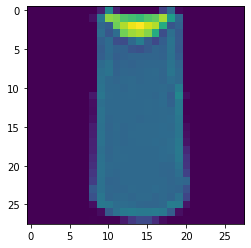

In [ ]:
# Número total de conjunto de dato entrenamiento y prueba

print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Defnición de las etiquetas (Creación Diccionario)
fashion_mnist_labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
                        5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

img_index = 2
label_index = y_train[img_index]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index])

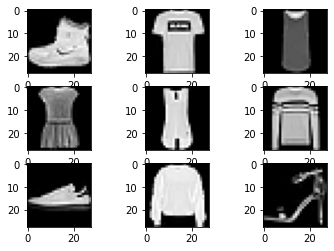

In [ ]:
# Gráfico 9 primeras imágenes del training dataset.
### Como hay 10 clases (0 -9 class labels) defino el subplot dentro de ese rango

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
 # show the figure
plt.show()

In [ ]:
# Normalizar la data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
#Verificación Normalización; C/imagen debe quedar rango 0-1 en ambos conjuntos de datos
np.amin(x_train)
np.amax(x_train)
np.amin(y_train)
np.amax(y_train)
print('Valor min x_train', np.amin(x_train),'Valor max x_train',np.amax(x_train),'Valor min x_test',np.amin(x_train),'Valor max x_test', np.amax(x_train))

Valor min x_train 0.0 Valor max x_train 1.0 Valor min x_test 0.0 Valor max x_test 1.0


In [ ]:
# Cantidad de imagenes por dataset
print(len(x_train))
print(len(x_test))

60000
10000


In [ ]:
# Separar el conjunto de training dataset en Entrenamiento y Validación  (# 10000 en el conjunto de validación y se mantiene los 50,000 restantes para entrenamiento)

(x_train, x_val) = x_train[10000:], x_train[:10000] 
(y_train, y_val) = y_train[10000:], y_train[:10000]

# Actualizar los datos de entrada de (28, 28) a (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Etiquetar clase a la nueva división de la data 
from keras.utils import to_categorical

num_classes = 10

y_train =to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

#Verificación y Numero por dataset
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

print(x_train.shape[0], 'Conjunto de Entrenamiento')
print(x_val.shape[0], 'Conjunto de Validación')
print(x_test.shape[0], 'Conjunto de Test')
print("x_train Dimensiones:", x_train.ndim, "x_val Dimensiones:", x_val.ndim, "x_test Dimensiones:", x_test.ndim)

x_train shape: (50000, 28, 28, 1) y_train shape: (50000, 10)
50000 Conjunto de Entrenamiento
10000 Conjunto de Validación
10000 Conjunto de Test
x_train Dimensiones: 4 x_val Dimensiones: 4 x_test Dimensiones: 4


In [ ]:
# Arquitectura y Definición de los Modelos 

##### Redes Neuronales Convolucionales (CNN) - Modelo Sequential ()

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import datetime

In [ ]:
im_size = 28
depth = 1
n_class= 10

model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(n_class, activation='softmax'))

print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                368650    
Total params: 387,466
Trainable params: 387,466
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#    CONFIGURAR EL MODELO
# Compilar el Modelo; se ocupa el optimizador SGD (stochastic gradient descent)

lr = 1e-2
opt = keras.optimizers.SGD(learning_rate=lr)

model.compile(optimizer=opt,
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# Entrenamiento del Modelo 

def fit_model(batch_size=64, epochs=10, callback_list=[]):
  history = model.fit(
         x_train,
         y_train,
         batch_size=batch_size,
         epochs=epochs,
         shuffle=True,
         validation_data=(x_val, y_val),
         verbose = 1,
         callbacks=callback_list)
    
  return history

In [ ]:
# Cargar en Carpeta "model_CNN1.hdf5" los pesos guardados 
model_path = PATH+"model_CNN1.hdf5"

SE AGREGA AL CALLBACK_LIST: 
MODELCHECKPOINT -
EARLYSTOPPING

In [ ]:
# CALLBACKS  
          ## ModelCheckpoint
          ## EarlyStopping

from keras.callbacks import EarlyStopping

# Definición del CALLBACKS:ModelCheckpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min')

# Definición del CALLBACK: EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0, 
                              patience=50, 
                              mode='min',
                              restore_best_weights=True)
#Generar Lista de Callback
callback_list = [checkpoint,earlystopping]


# Definición del CALLBACKS:Tensorboard 
#logdir = 'logs/sample/keras'
#tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

In [ ]:
# PARA VISUALIZAR TENSORBOARD
'''
## Cargar Extensión de TensorBoard en Jupyter
%load_ext tensorboard

# Limpiar logs anteriores
!rm -rf ./logs/sample 

# Abrir TensorBoard con la Carpeta de logs Definida
%tensorboard --logdir logs/sample

'''

'\n## Cargar Extensión de TensorBoard en Jupyter\n%load_ext tensorboard\n\n# Limpiar logs anteriores\n!rm -rf ./logs/sample \n\n# Abrir TensorBoard con la Carpeta de logs Definida\n%tensorboard --logdir logs/sample\n\n'

ENTRENAMIENTO

In [ ]:
history= fit_model( epochs=50, callback_list=callback_list)

Epoch 1/50
778/782 [============================>.] - ETA: 0s - loss: 0.8049 - accuracy: 0.7261
Epoch 00001: val_loss improved from inf to 1.03267, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN1.hdf5
782/782 [==============================] - 4s 5ms/step - loss: 0.8051 - accuracy: 0.7259 - val_loss: 1.0327 - val_accuracy: 0.7204
Epoch 2/50
775/782 [============================>.] - ETA: 0s - loss: 0.5498 - accuracy: 0.8048
Epoch 00002: val_loss improved from 1.03267 to 0.58893, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN1.hdf5
782/782 [==============================] - 3s 4ms/step - loss: 0.5489 - accuracy: 0.8050 - val_loss: 0.5889 - val_accuracy: 0.7815
Epoch 3/50
771/782 [============================>.] - ETA: 0s - loss: 0.4875 - accuracy: 0.8278
Epoch 00003: val_loss improved from 0.58893 to 0.55785, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN1.hdf5
782/782 [==============================] - 3s 4ms/step - loss: 0

EVALUAR MODELO

In [ ]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, val_acc = model.evaluate(x_val, y_val, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: {}%\nVal: {}%\nTest: {}%'.format(round(train_acc*100,2), round(val_acc*100, 2), round(test_acc*100, 2)))

Train: 93.62%
Val: 89.95%
Test: 89.56%


CURVAS

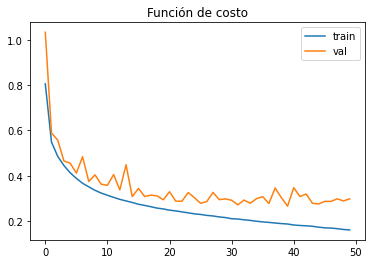

In [ ]:
# Función de costo
plt.figure()
plt.title('Función de costo')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

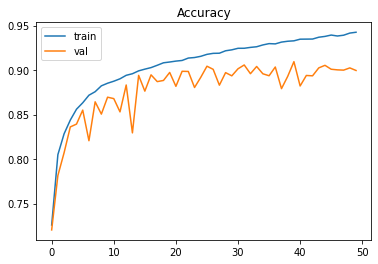

In [ ]:
# Accuracy
plt.figure()
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [ ]:
import numpy as np
# guardar
np.save(PATH+'acc_train.npy', history.history['accuracy'])
# leer
logs = np.load(PATH+'acc_train.npy')

AL MISMO MODELO SEQUENTIAL()

SE ADICIONA: GENERADOR DE IMAGEN

SE ADICIONA: CAPA - MAXPOOLING2D SEGUIDA DE C/CAPA 
CONV2D 

SE CAMBIA EL OPTIMIZADOR: ADM

In [ ]:
## GENERADOR DE IMAGEN
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 64

train_generator = train_datagen.flow(x_train, y=y_train, batch_size=batch_size)
val_generator = val_datagen.flow(x_val, y=y_val, batch_size=batch_size)
test_generator = test_datagen.flow(x_test, y=y_test, batch_size=batch_size)

In [ ]:
  ### DEFINICIÓN MODELO 2                                                      
from keras.layers import BatchNormalization, MaxPooling2D, Activation

model2 = Sequential()

model2.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, kernel_size=3, activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())  
model2.add(Dense(n_class, activation='softmax'))

print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [ ]:
## COMPLILAR MODELO2
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Cargar en Carpeta "model_CNN2.hdf5" los pesos guardados 
model_path = PATH+"model_CNN2.hdf5" 

In [ ]:
# DEFINICIÓN CALLBACKS ------> SE ADICIONA EarlyStopping
          ## ModelCheckpoint
          ## EarlyStopping

# Definición del CALLBACKS:ModelCheckpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min')

# Definición del CALLBACK: EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0, 
                              patience=50, 
                              mode='min',
                              restore_best_weights=True)

#Generar Lista de Callback
callback_list = [checkpoint,earlystopping]


# Definición del CALLBACK:Tensorboard 
#logdir = 'logs/sample/keras'
#tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

In [ ]:
# PARA VISUALIZAR TENSORBOARD
'''
## Cargar Extensión de TensorBoard en Jupyter
%load_ext tensorboard

# Limpiar logs anteriores
!rm -rf ./logs/sample 

# Abrir TensorBoard con la Carpeta de logs Definida
%tensorboard --logdir logs/sample

'''

'\n## Cargar Extensión de TensorBoard en Jupyter\n%load_ext tensorboard\n\n# Limpiar logs anteriores\n!rm -rf ./logs/sample \n\n# Abrir TensorBoard con la Carpeta de logs Definida\n%tensorboard --logdir logs/sample\n\n'

ENTRENAMIENTO

In [ ]:
train_steps = x_train.shape[0] // batch_size
val_steps = x_val.shape[0] // batch_size

epochs = 1000

history2 = model2.fit(
            train_generator, 
            steps_per_epoch=train_steps,
            validation_data=val_generator,
            validation_steps=val_steps,
            epochs=epochs,  
            verbose=1,
            callbacks=callback_list
          )

Epoch 1/1000
779/781 [============================>.] - ETA: 0s - loss: 1.0851 - accuracy: 0.6264
Epoch 00001: val_loss improved from inf to 0.74679, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN2.hdf5
781/781 [==============================] - 3s 4ms/step - loss: 1.0839 - accuracy: 0.6268 - val_loss: 0.7468 - val_accuracy: 0.7181
Epoch 2/1000
776/781 [============================>.] - ETA: 0s - loss: 0.7088 - accuracy: 0.7401
Epoch 00002: val_loss improved from 0.74679 to 0.66608, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN2.hdf5
781/781 [==============================] - 3s 4ms/step - loss: 0.7091 - accuracy: 0.7399 - val_loss: 0.6661 - val_accuracy: 0.7511
Epoch 3/1000
772/781 [============================>.] - ETA: 0s - loss: 0.6563 - accuracy: 0.7583
Epoch 00003: val_loss improved from 0.66608 to 0.64016, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN2.hdf5
781/781 [==============================] - 3s 4ms/step - l

EVALUAR MODELO

In [ ]:
_, train_acc2 = model2.evaluate(x_train, y_train, verbose=0)
_, val_acc2 = model2.evaluate(x_val, y_val, verbose=0)
_, test_acc2 = model2.evaluate(x_test, y_test, verbose=0)
print('Train: {}%\nVal: {}%\nTest: {}%'.format(round(train_acc2*100,2), round(val_acc2*100, 2), round(test_acc2*100, 2)))

Train: 40.38%
Val: 40.16%
Test: 40.6%


CURVAS

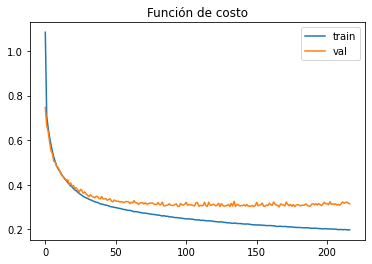

In [ ]:
# Función de costo
plt.figure()
plt.title('Función de costo')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='val')
plt.legend()
# plt.savefig(PATH+'loss.png')   # para guardar gráfico
plt.show()

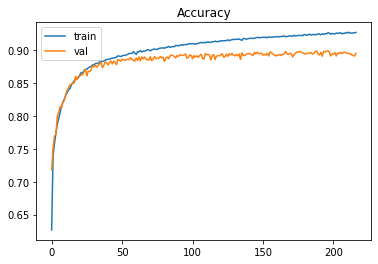

In [ ]:
# Accuracy
plt.figure()
plt.title('Accuracy')
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [ ]:
import numpy as np
# guardar
np.save(PATH+'acc2_train.npy', history2.history['accuracy'])
# leer
logs = np.load(PATH+'acc2_train.npy')

In [ ]:
### DEFINICIÓN MODELO 3                                                      
from keras.layers import BatchNormalization, MaxPooling2D, Activation, Dropout

model3 = Sequential()

model3.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(64, kernel_size=3, activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.3))

model3.add(Flatten())
model3.add(Dropout(0.3))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(n_class, activation='softmax'))

print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

In [ ]:
## COMPLILAR MODELO3
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Cargar en Carpeta "model_CNN3.hdf5" los pesos guardados 
model_path = PATH+"model_CNN3.hdf5" 

In [ ]:
# DEFINICIÓN CALLBACKS ------> SE ADICIONA EarlyStopping
          ## ModelCheckpoint
          ## EarlyStopping

# Definición del CALLBACKS:ModelCheckpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min')

# Definición del CALLBACK: EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0, 
                              patience=50, 
                              mode='min',
                              restore_best_weights=True)

#Generar Lista de Callback
callback_list = [checkpoint,earlystopping]

# Definición del CALLBACK:Tensorboard 
# logdir = 'logs/sample/keras'
# tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

In [ ]:
# PARA VISUALIZAR TENSORBOARD
'''
## Cargar Extensión de TensorBoard en Jupyter
%load_ext tensorboard

# Limpiar logs anteriores
!rm -rf ./logs/sample 

# Abrir TensorBoard con la Carpeta de logs Definida
%tensorboard --logdir logs/sample
'''

In [ ]:
train_steps = x_train.shape[0] // batch_size
val_steps = x_val.shape[0] // batch_size

epochs = 1000

history3 = model3.fit(
            train_generator, 
            steps_per_epoch=train_steps,
            validation_data=val_generator,
            validation_steps=val_steps,
            epochs=epochs,  
            verbose=1,
            callbacks=callback_list
          )

Epoch 1/1000
776/781 [============================>.] - ETA: 0s - loss: 0.5613 - accuracy: 0.7926
Epoch 00001: val_loss improved from inf to 0.41677, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN3.hdf5
781/781 [==============================] - 4s 5ms/step - loss: 0.5608 - accuracy: 0.7928 - val_loss: 0.4168 - val_accuracy: 0.8500
Epoch 2/1000
775/781 [============================>.] - ETA: 0s - loss: 0.4141 - accuracy: 0.8491
Epoch 00002: val_loss improved from 0.41677 to 0.34758, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN3.hdf5
781/781 [==============================] - 3s 4ms/step - loss: 0.4140 - accuracy: 0.8491 - val_loss: 0.3476 - val_accuracy: 0.8744
Epoch 3/1000
776/781 [============================>.] - ETA: 0s - loss: 0.3780 - accuracy: 0.8613
Epoch 00003: val_loss improved from 0.34758 to 0.33416, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN3.hdf5
781/781 [==============================] - 3s 4ms/step - l

In [ ]:
_, train_acc3 = model3.evaluate(x_train, y_train, verbose=0)
_, val_acc3 = model3.evaluate(x_val, y_val, verbose=0)
_, test_acc3 = model3.evaluate(x_test, y_test, verbose=0)
print('Train: {}%\nVal: {}%\nTest: {}%'.format(round(train_acc3*100,2), round(val_acc3*100, 2), round(test_acc3*100, 2)))

Train: 82.75%
Val: 82.19%
Test: 81.64%


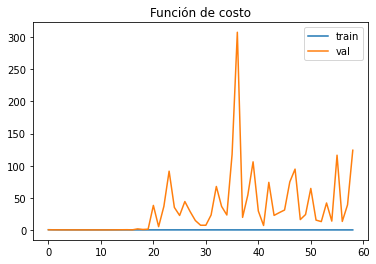

In [ ]:
# Función de costo
plt.figure()
plt.title('Función de costo')
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='val')
plt.legend()
# plt.savefig(PATH+'loss.png')   # para guardar gráfico
plt.show()

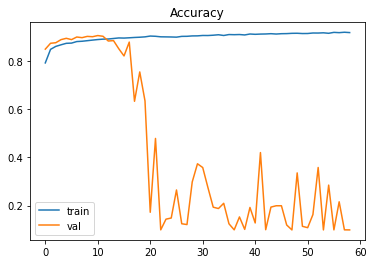

In [ ]:
# Accuracy
plt.figure()
plt.title('Accuracy')
plt.plot(history3.history['accuracy'], label='train')
plt.plot(history3.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [ ]:
import numpy as np
# guardar
np.save(PATH+'acc3_train.npy', history3.history['accuracy'])
# leer
logs = np.load(PATH+'acc3_train.npy')

AJUSTES AL MODELO 3

In [ ]:
### DEFINICIÓN AJUSTE MODELO 3                                                      
from keras.layers import BatchNormalization, MaxPooling2D, Activation, Dropout

model4 = Sequential()

model4.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model4.add(Conv2D(16, kernel_size=3, activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(32, kernel_size=3, activation='relu'))
model4.add(Conv2D(32, kernel_size=3, activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(n_class, activation='softmax'))

print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)              

In [ ]:
## COMPLILAR MODELO4
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Cargar en Carpeta "model_CNN4.hdf5" los pesos guardados 
model_path = PATH+"model_CNN4.hdf5" 

In [ ]:
# DEFINICIÓN CALLBACKS ------> SE ADICIONA EarlyStopping
          ## ModelCheckpoint
          ## EarlyStopping

# Definición del CALLBACKS:ModelCheckpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min')

# Definición del CALLBACK: EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0, 
                              patience=50, 
                              mode='min',
                              restore_best_weights=True)

#Generar Lista de Callback
callback_list = [checkpoint,earlystopping]

In [ ]:
train_steps = x_train.shape[0] // batch_size
val_steps = x_val.shape[0] // batch_size

epochs = 1000

history4 = model4.fit(
            train_generator, 
            steps_per_epoch=train_steps,
            validation_data=val_generator,
            validation_steps=val_steps,
            epochs=epochs,  
            verbose=1,
            callbacks=callback_list
          )

Epoch 1/1000
781/781 [==============================] - ETA: 0s - loss: 0.7348 - accuracy: 0.7286
Epoch 00001: val_loss improved from inf to 1.37826, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN4.hdf5
781/781 [==============================] - 4s 6ms/step - loss: 0.7348 - accuracy: 0.7286 - val_loss: 1.3783 - val_accuracy: 0.5686
Epoch 2/1000
770/781 [============================>.] - ETA: 0s - loss: 0.5078 - accuracy: 0.8103
Epoch 00002: val_loss improved from 1.37826 to 0.62623, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN4.hdf5
781/781 [==============================] - 4s 5ms/step - loss: 0.5068 - accuracy: 0.8107 - val_loss: 0.6262 - val_accuracy: 0.7734
Epoch 3/1000
776/781 [============================>.] - ETA: 0s - loss: 0.4417 - accuracy: 0.8381
Epoch 00003: val_loss did not improve from 0.62623
781/781 [==============================] - 4s 5ms/step - loss: 0.4421 - accuracy: 0.8378 - val_loss: 0.8719 - val_accuracy: 0.7076
Epoch 

In [ ]:
_, train_acc4 = model4.evaluate(x_train, y_train, verbose=0)
_, val_acc4 = model4.evaluate(x_val, y_val, verbose=0)
_, test_acc4 = model4.evaluate(x_test, y_test, verbose=0)
print('Train: {}%\nVal: {}%\nTest: {}%'.format(round(train_acc4*100,2), round(val_acc4*100, 2), round(test_acc4*100, 2)))

Train: 50.7%
Val: 50.87%
Test: 49.88%


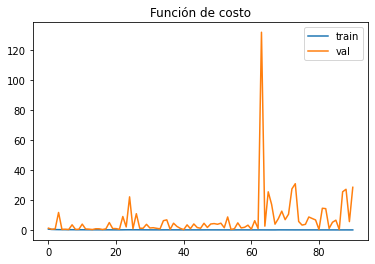

In [ ]:
# Función de costo
plt.figure()
plt.title('Función de costo')
plt.plot(history4.history['loss'], label='train')
plt.plot(history4.history['val_loss'], label='val')
plt.legend()
# plt.savefig(PATH+'loss.png')   # para guardar gráfico
plt.show()

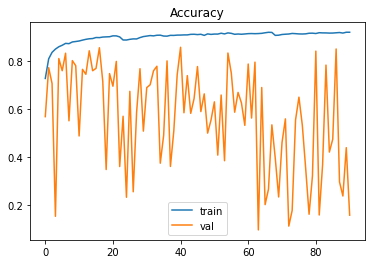

In [ ]:
# Accuracy
plt.figure()
plt.title('Accuracy')
plt.plot(history4.history['accuracy'], label='train')
plt.plot(history4.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [ ]:
import numpy as np
# guardar
np.save(PATH+'acc4_train.npy', history4.history['accuracy'])
# leer
logs = np.load(PATH+'acc4_train.npy')

SEGUNDO AJUSTE MODELO 3

In [ ]:
### DEFINICIÓN AJUSTE MODELO 3                                                      
from keras.layers import  MaxPooling2D, Activation, Dropout

model5 = Sequential()

model5.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model5.add(Conv2D(16, kernel_size=3, activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Conv2D(32, kernel_size=3, activation='relu'))
model5.add(Conv2D(32, kernel_size=3, activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Flatten())
model5.add(Dropout(0.2))
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(n_class, activation='softmax'))

print(model5.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)              

In [ ]:
## COMPLILAR MODELO5
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Cargar en Carpeta "model_CNN5.hdf5" los pesos guardados 
model_path = PATH+"model_CNN5.hdf5" 

In [ ]:
# DEFINICIÓN CALLBACKS ------> SE ADICIONA EarlyStopping
          ## ModelCheckpoint
          ## EarlyStopping

# Definición del CALLBACKS:ModelCheckpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min')

# Definición del CALLBACK: EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0, 
                              patience=50, 
                              mode='min',
                              restore_best_weights=True)

#Generar Lista de Callback
callback_list = [checkpoint,earlystopping]

In [ ]:
train_steps = x_train.shape[0] // batch_size
val_steps = x_val.shape[0] // batch_size

epochs = 1000

history5 = model5.fit(
            train_generator, 
            steps_per_epoch=train_steps,
            validation_data=val_generator,
            validation_steps=val_steps,
            epochs=epochs,  
            verbose=1,
            callbacks=callback_list
          )

Epoch 1/1000
779/781 [============================>.] - ETA: 0s - loss: 1.2059 - accuracy: 0.5423
Epoch 00001: val_loss improved from inf to 0.72216, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN5.hdf5
781/781 [==============================] - 4s 5ms/step - loss: 1.2048 - accuracy: 0.5427 - val_loss: 0.7222 - val_accuracy: 0.7260
Epoch 2/1000
780/781 [============================>.] - ETA: 0s - loss: 0.7500 - accuracy: 0.7113
Epoch 00002: val_loss improved from 0.72216 to 0.62624, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN5.hdf5
781/781 [==============================] - 3s 4ms/step - loss: 0.7500 - accuracy: 0.7113 - val_loss: 0.6262 - val_accuracy: 0.7628
Epoch 3/1000
776/781 [============================>.] - ETA: 0s - loss: 0.6529 - accuracy: 0.7488
Epoch 00003: val_loss improved from 0.62624 to 0.55780, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN5.hdf5
781/781 [==============================] - 3s 4ms/step - l

In [ ]:
_, train_acc5 = model5.evaluate(x_train, y_train, verbose=0)
_, val_acc5 = model5.evaluate(x_val, y_val, verbose=0)
_, test_acc5 = model5.evaluate(x_test, y_test, verbose=0)
print('Train: {}%\nVal: {}%\nTest: {}%'.format(round(train_acc5*100,2), round(val_acc5*100, 2), round(test_acc5*100, 2)))

Train: 48.56%
Val: 48.52%
Test: 47.71%


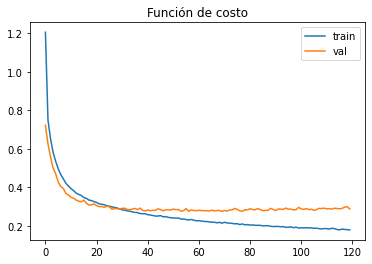

In [ ]:
# Función de costo
plt.figure()
plt.title('Función de costo')
plt.plot(history5.history['loss'], label='train')
plt.plot(history5.history['val_loss'], label='val')
plt.legend()
# plt.savefig(PATH+'loss.png')   # para guardar gráfico
plt.show()

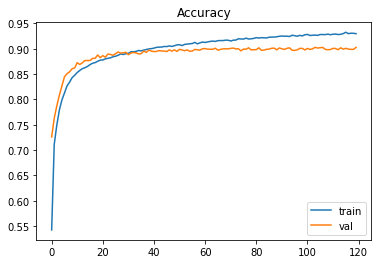

In [ ]:
# Accuracy
plt.figure()
plt.title('Accuracy')
plt.plot(history5.history['accuracy'], label='train')
plt.plot(history5.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [ ]:
import numpy as np
# guardar
np.save(PATH+'acc5_train.npy', history5.history['accuracy'])
# leer
logs = np.load(PATH+'acc5_train.npy')

In [ ]:
### DEFINICIÓN AJUSTE MODELO 3  padding='same'                                                    
from keras.layers import  MaxPooling2D, Activation, Dropout

model6 = Sequential()

model6.add(Conv2D(32, kernel_size=3,padding='same', activation='relu', input_shape=(28,28,1)))
model6.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model6.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Flatten())
model6.add(Dense(256, activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(n_class, activation='softmax'))

print(model6.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)              

In [ ]:
## COMPLILAR MODELO5
model6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Cargar en Carpeta "model_CNN6.hdf5" los pesos guardados 
model_path = PATH+"model_CNN6.hdf5" 

In [ ]:
# DEFINICIÓN CALLBACKS ------> SE ADICIONA EarlyStopping
          ## ModelCheckpoint
          ## EarlyStopping

# Definición del CALLBACKS:ModelCheckpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min')

# Definición del CALLBACK: EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0, 
                              patience=50, 
                              mode='min',
                              restore_best_weights=True)

#Generar Lista de Callback
callback_list = [checkpoint,earlystopping]

In [ ]:
train_steps = x_train.shape[0] // batch_size
val_steps = x_val.shape[0] // batch_size

epochs = 1000

history6 = model6.fit(
            train_generator, 
            steps_per_epoch=train_steps,
            validation_data=val_generator,
            validation_steps=val_steps,
            epochs=epochs,  
            verbose=1,
            callbacks=callback_list
          )

Epoch 1/1000
775/781 [============================>.] - ETA: 0s - loss: 0.8879 - accuracy: 0.6671
Epoch 00001: val_loss improved from inf to 0.54515, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN6.hdf5
781/781 [==============================] - 4s 5ms/step - loss: 0.8857 - accuracy: 0.6679 - val_loss: 0.5451 - val_accuracy: 0.7894
Epoch 2/1000
779/781 [============================>.] - ETA: 0s - loss: 0.4808 - accuracy: 0.8228
Epoch 00002: val_loss improved from 0.54515 to 0.41226, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN6.hdf5
781/781 [==============================] - 4s 5ms/step - loss: 0.4805 - accuracy: 0.8229 - val_loss: 0.4123 - val_accuracy: 0.8478
Epoch 3/1000
769/781 [============================>.] - ETA: 0s - loss: 0.4031 - accuracy: 0.8522
Epoch 00003: val_loss improved from 0.41226 to 0.37042, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN6.hdf5
781/781 [==============================] - 4s 5ms/step - l

In [ ]:
_, train_acc6 = model6.evaluate(x_train, y_train, verbose=0)
_, val_acc6 = model6.evaluate(x_val, y_val, verbose=0)
_, test_acc6 = model6.evaluate(x_test, y_test, verbose=0)
print('Train: {}%\nVal: {}%\nTest: {}%'.format(round(train_acc6*100,2), round(val_acc6*100, 2), round(test_acc6*100, 2)))

Train: 84.65%
Val: 83.47%
Test: 81.95%


In [ ]:
# Función de costo
plt.figure()
plt.title('Función de costo')
plt.plot(history6.history['loss'], label='train')
plt.plot(history6.history['val_loss'], label='val')
plt.legend()
# plt.savefig(PATH+'loss.png')   # para guardar gráfico
plt.show()

In [ ]:
# Accuracy
plt.figure()
plt.title('Accuracy')
plt.plot(history6.history['accuracy'], label='train')
plt.plot(history6.history['val_accuracy'], label='val')
plt.legend()
plt.show()